In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("./train.csv")
data.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [3]:
data.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [4]:
data.dtypes

GameId                      int64
PlayId                      int64
Team                       object
X                         float64
Y                         float64
S                         float64
A                         float64
Dis                       float64
Orientation               float64
Dir                       float64
NflId                       int64
DisplayName                object
JerseyNumber                int64
Season                      int64
YardLine                    int64
Quarter                     int64
GameClock                  object
PossessionTeam             object
Down                        int64
Distance                    int64
FieldPosition              object
HomeScoreBeforePlay         int64
VisitorScoreBeforePlay      int64
NflIdRusher                 int64
OffenseFormation           object
OffensePersonnel           object
DefendersInTheBox         float64
DefensePersonnel           object
PlayDirection              object
TimeHandoff   

[[75.82, 17.56, 185, 178.97, 2649, 2543773], [74.78, 33.21, 265, 178.82, 497240, 2543773], [75.43, 32.41, 335, 207.08, 2495131, 2543773], [75.9, 25.12, 325, 133.01, 2495232, 2543773], [79.76, 29.49, 225, 192.18, 2504211, 2543773], [76.47, 36.91, 210, 112.02, 2530515, 2543773], [74.7, 19.19, 183, 152.14, 2543498, 2543773], [78.75, 30.53, 205, 161.98, 2543773, 2543773], [74.6, 31.88, 310, 218.49, 2552563, 2543773], [74.58, 29.12, 300, 169.36, 2553632, 2543773], [74.58, 28.47, 308, 207.09, 2555281, 2543773]]
[[73.91, 34.84, 212, 81.99, 496723, 2543773], [74.67, 32.64, 288, 27.61, 2495116, 2543773], [74.0, 33.2, 270, 3.01, 2495493, 2543773], [71.46, 27.7, 245, 359.77, 2506353, 2543773], [69.32, 35.42, 206, 12.63, 2530794, 2543773], [75.06, 24.0, 252, 308.34, 2543494, 2543773], [74.11, 16.64, 190, 357.23, 2543637, 2543773], [73.37, 18.73, 193, 328.52, 2543851, 2543773], [56.63, 26.9, 208, 344.7, 2550257, 2543773], [73.35, 38.83, 197, 75.47, 2552488, 2543773], [74.15, 28.9, 308, 342.58, 2556

<Figure size 4320x2160 with 0 Axes>

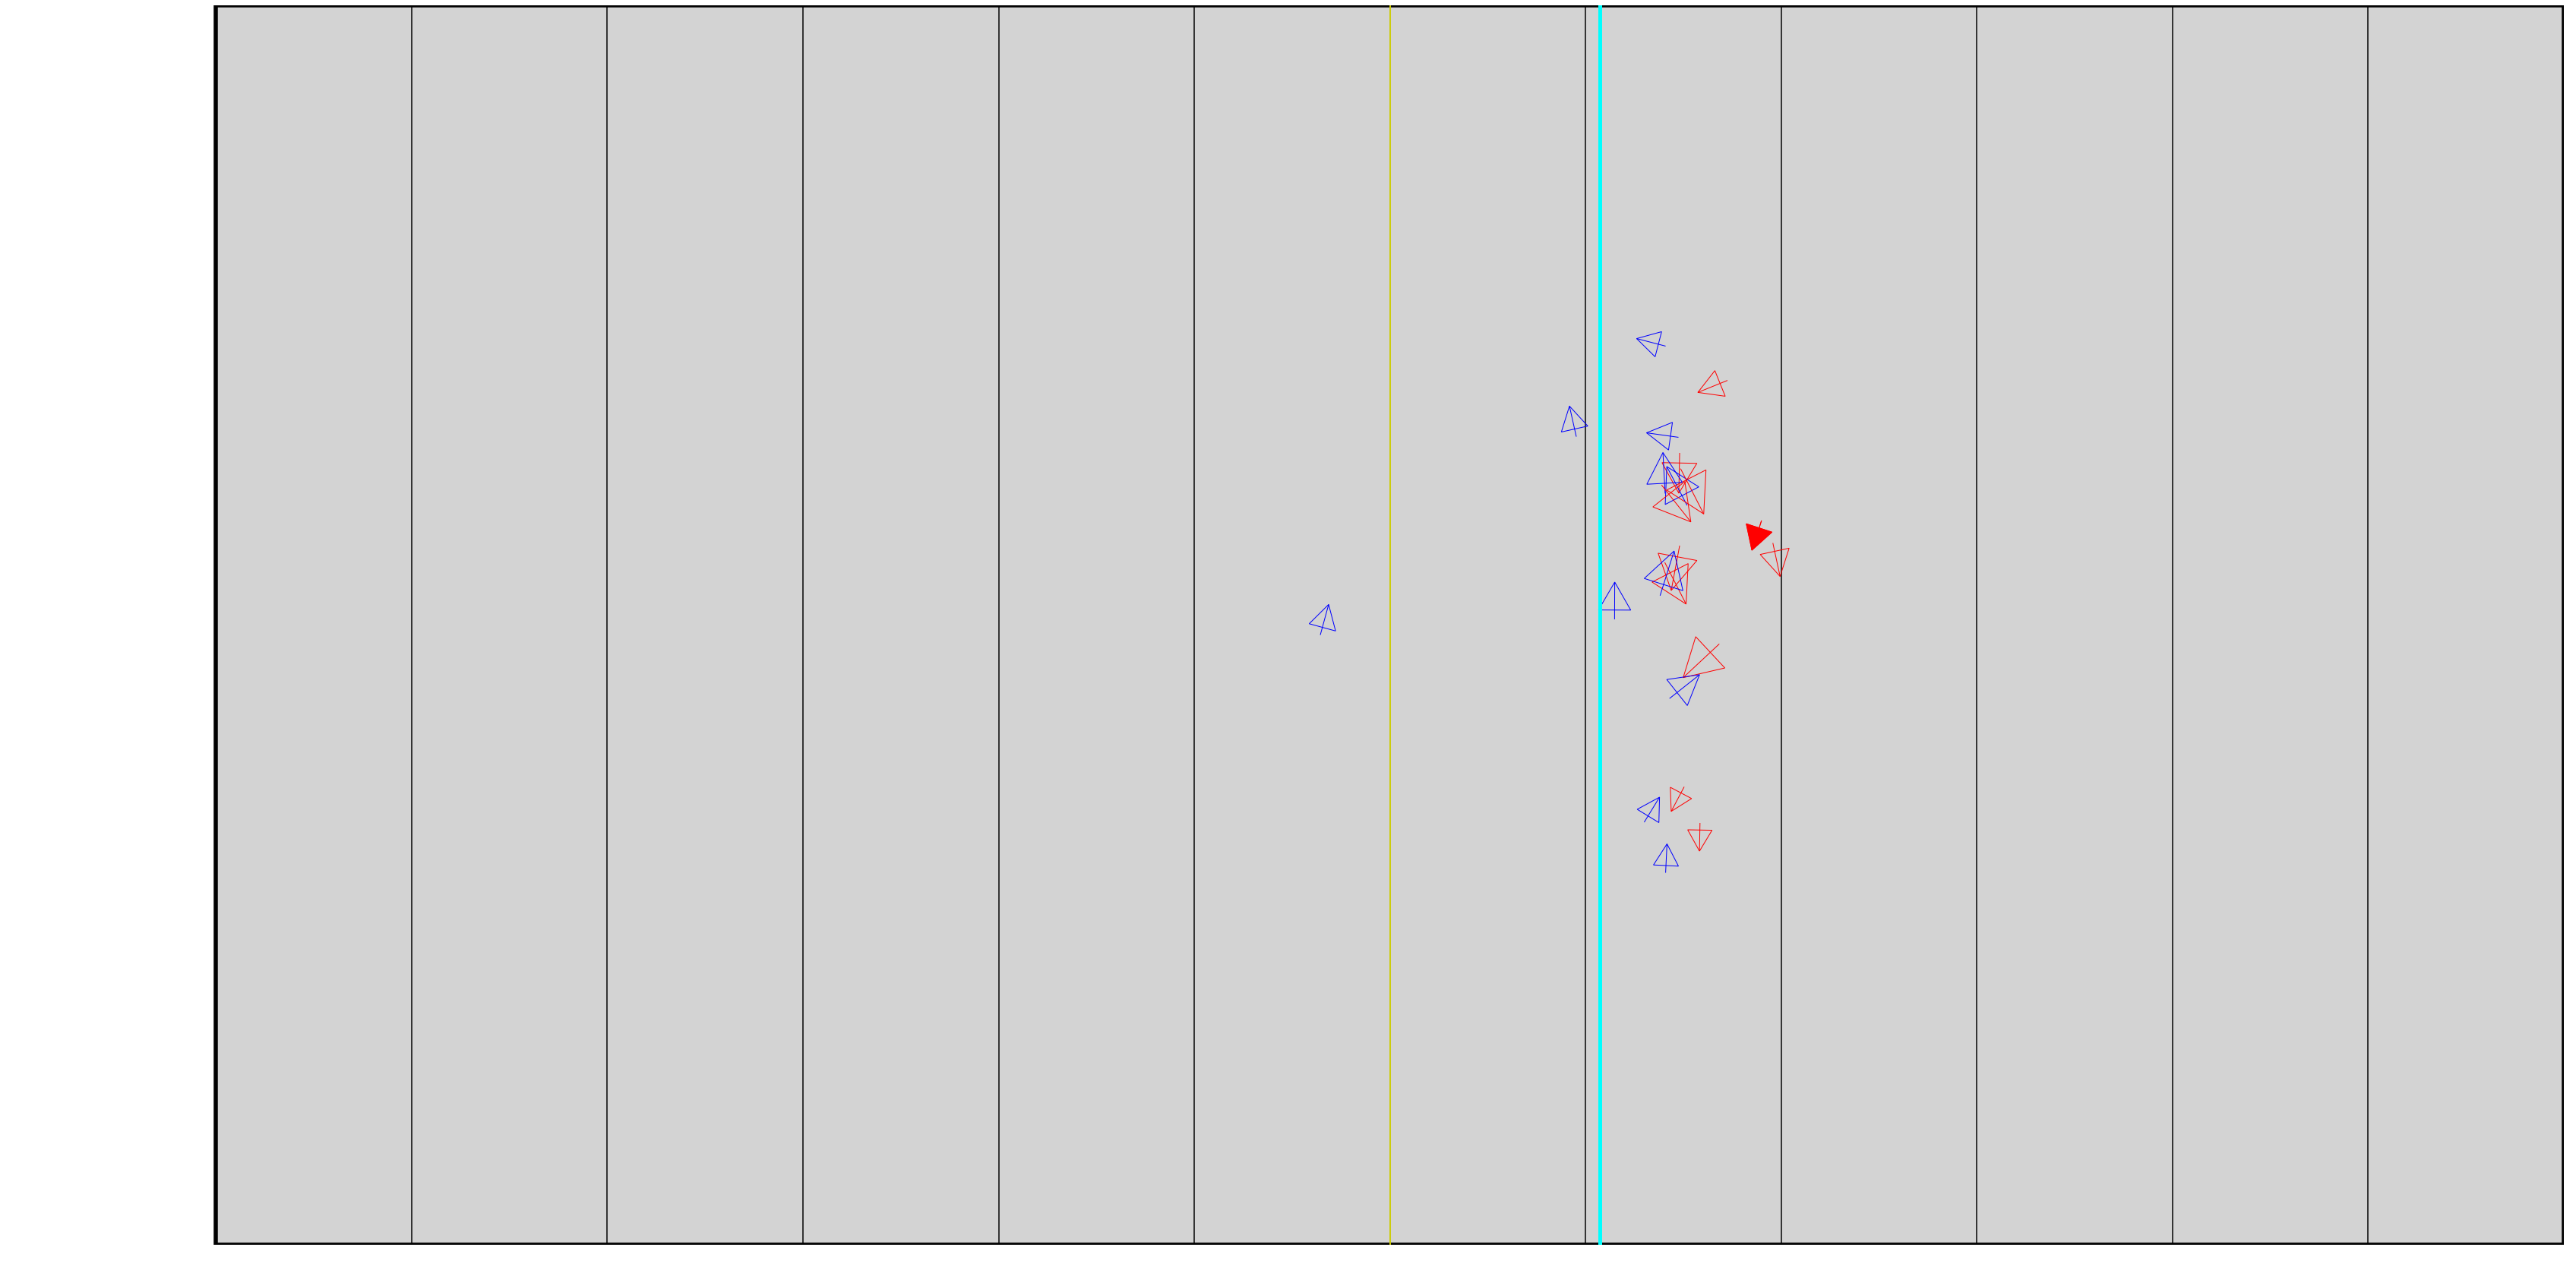

In [53]:
homeArray = []
awayArray = []
yardsGained = 0
playDirection = ''
count = 0
for index, row in data.iterrows():
    if row['PlayId'] == 20170907000118:
        if row['Team'] == 'away':
            awayArray.append([row['X'], row['Y'], row['PlayerWeight'], row['Orientation'], row['NflId'], row['NflIdRusher']])
        else:
            homeArray.append([row['X'], row['Y'], row['PlayerWeight'], row['Orientation'], row['NflId'], row['NflIdRusher']])
        yardsGained = row['Yards']
        playDirection = row['PlayDirection']
    else:
        break
print(homeArray)
print(awayArray)
homeX, homeY, homeWeight, homeOrientation, homeId, homeRusherId = zip(*homeArray)
awayX, awayY, awayWeight, awayOrientation, awayId, awayRusherId = zip(*awayArray)


fig = plt.figure(figsize=(60,30))
fig.suptitle('test title', fontsize=20)

field = patches.Rectangle((0, 0), 120, 53.3, linewidth=5.5,
                             edgecolor='black', facecolor='lightgrey', zorder=0)
    
fig, ax = plt.subplots(1, figsize=(60,30))
ax.add_patch(field)

plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
          53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='black')
plt.plot([60, 60], [0, 53.3], color='yellow')

plt.xlim(-10, 120); plt.ylim(0, 53.3)
plt.axis('off')
    
        

for i in range(len(homeX)):
    if homeId[i] == homeRusherId[i]:
        if playDirection == 'left':
            plt.plot([homeX[i] - yardsGained, homeX[i] - yardsGained], [0, 58.3],linewidth=5, color='aqua')
        if playDirection == 'right':
            plt.plot([homeX[i] + yardsGained, homeX[i] + yardsGained], [0, 58.3],linewidth=5, color='aqua')
        
        plt.plot(homeX[i],homeY[i], color='red', markersize=homeWeight[i]/5, marker=(3,0,homeOrientation[i]),linestyle='solid',markeredgecolor="red")
        plt.plot(homeX[i],homeY[i], color='red', markersize=homeWeight[i]/5, marker=(2,0,homeOrientation[i]),linestyle='solid',markeredgecolor="red")
    elif awayId[i] == awayRusherId[i]:
        if playDirection == 'left':
            plt.plot([awayX[i] - yardsGained, awayX[i] - yardsGained], [0, 58.3],linewidth=5, color='aqua')
        if playDirection == 'right':
            plt.plot([awayX[i] + yardsGained, awayX[i] + yardsGained], [0, 58.3],linewidth=5, color='aqua')
        
        plt.plot(awayX[i], awayY[i], color="blue", markersize=awayWeight[i]/5, marker=(2,0,awayOrientation[i]), linestyle='solid',markeredgecolor="blue")
        plt.plot(awayX[i], awayY[i], color="blue", markersize=awayWeight[i]/5, marker=(3,0,awayOrientation[i]), linestyle='solid',markeredgecolor="blue")
#     else:
    plt.plot(homeX[i],homeY[i], color='none', markersize=homeWeight[i]/5, marker=(3,0,homeOrientation[i]),linestyle='solid',markeredgecolor="red")
    plt.plot(homeX[i],homeY[i], color='none', markersize=homeWeight[i]/5, marker=(2,0,homeOrientation[i]),linestyle='solid',markeredgecolor="red")
    plt.plot(awayX[i], awayY[i], color="none", markersize=awayWeight[i]/5, marker=(2,0,awayOrientation[i]), linestyle='solid',markeredgecolor="blue")
    plt.plot(awayX[i], awayY[i], color="none", markersize=awayWeight[i]/5, marker=(3,0,awayOrientation[i]), linestyle='solid',markeredgecolor="blue")
plt.show()
    
    
#     if row[index]['PlayId'] == 20170907000118:
#         print(row[index]['PlayId'])
#         print(row[index]['X'])
#         array.append((row[3], row[4]))

# print(array)

# x, y = zip(*array)
# plt.scatter(x, y)
# plt.show()

In [55]:
modDataFrame = data.drop(
    ["Orientation", "DisplayName", "JerseyNumber", "VisitorScoreBeforePlay", "HomeScoreBeforePlay", "PlayerBirthDate", "VisitorTeamAbbr", "HomeTeamAbbr","Stadium"], axis=1)
print(modDataFrame.columns)
matrix = modDataFrame.values

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Dir', 'NflId',
       'Season', 'YardLine', 'Quarter', 'GameClock', 'PossessionTeam', 'Down',
       'Distance', 'FieldPosition', 'NflIdRusher', 'OffenseFormation',
       'OffensePersonnel', 'DefendersInTheBox', 'DefensePersonnel',
       'PlayDirection', 'TimeHandoff', 'TimeSnap', 'Yards', 'PlayerHeight',
       'PlayerWeight', 'PlayerCollegeName', 'Position', 'Week', 'Location',
       'StadiumType', 'Turf', 'GameWeather', 'Temperature', 'Humidity',
       'WindSpeed', 'WindDirection'],
      dtype='object')


In [56]:
print(matrix)

[[2017090700 20170907000118 'away' ..., 77.0 8.0 'SW']
 [2017090700 20170907000118 'away' ..., 77.0 8.0 'SW']
 [2017090700 20170907000118 'away' ..., 77.0 8.0 'SW']
 ..., 
 [2018123015 20181230154157 'home' ..., 76.0 5 'SE']
 [2018123015 20181230154157 'home' ..., 76.0 5 'SE']
 [2018123015 20181230154157 'home' ..., 76.0 5 'SE']]


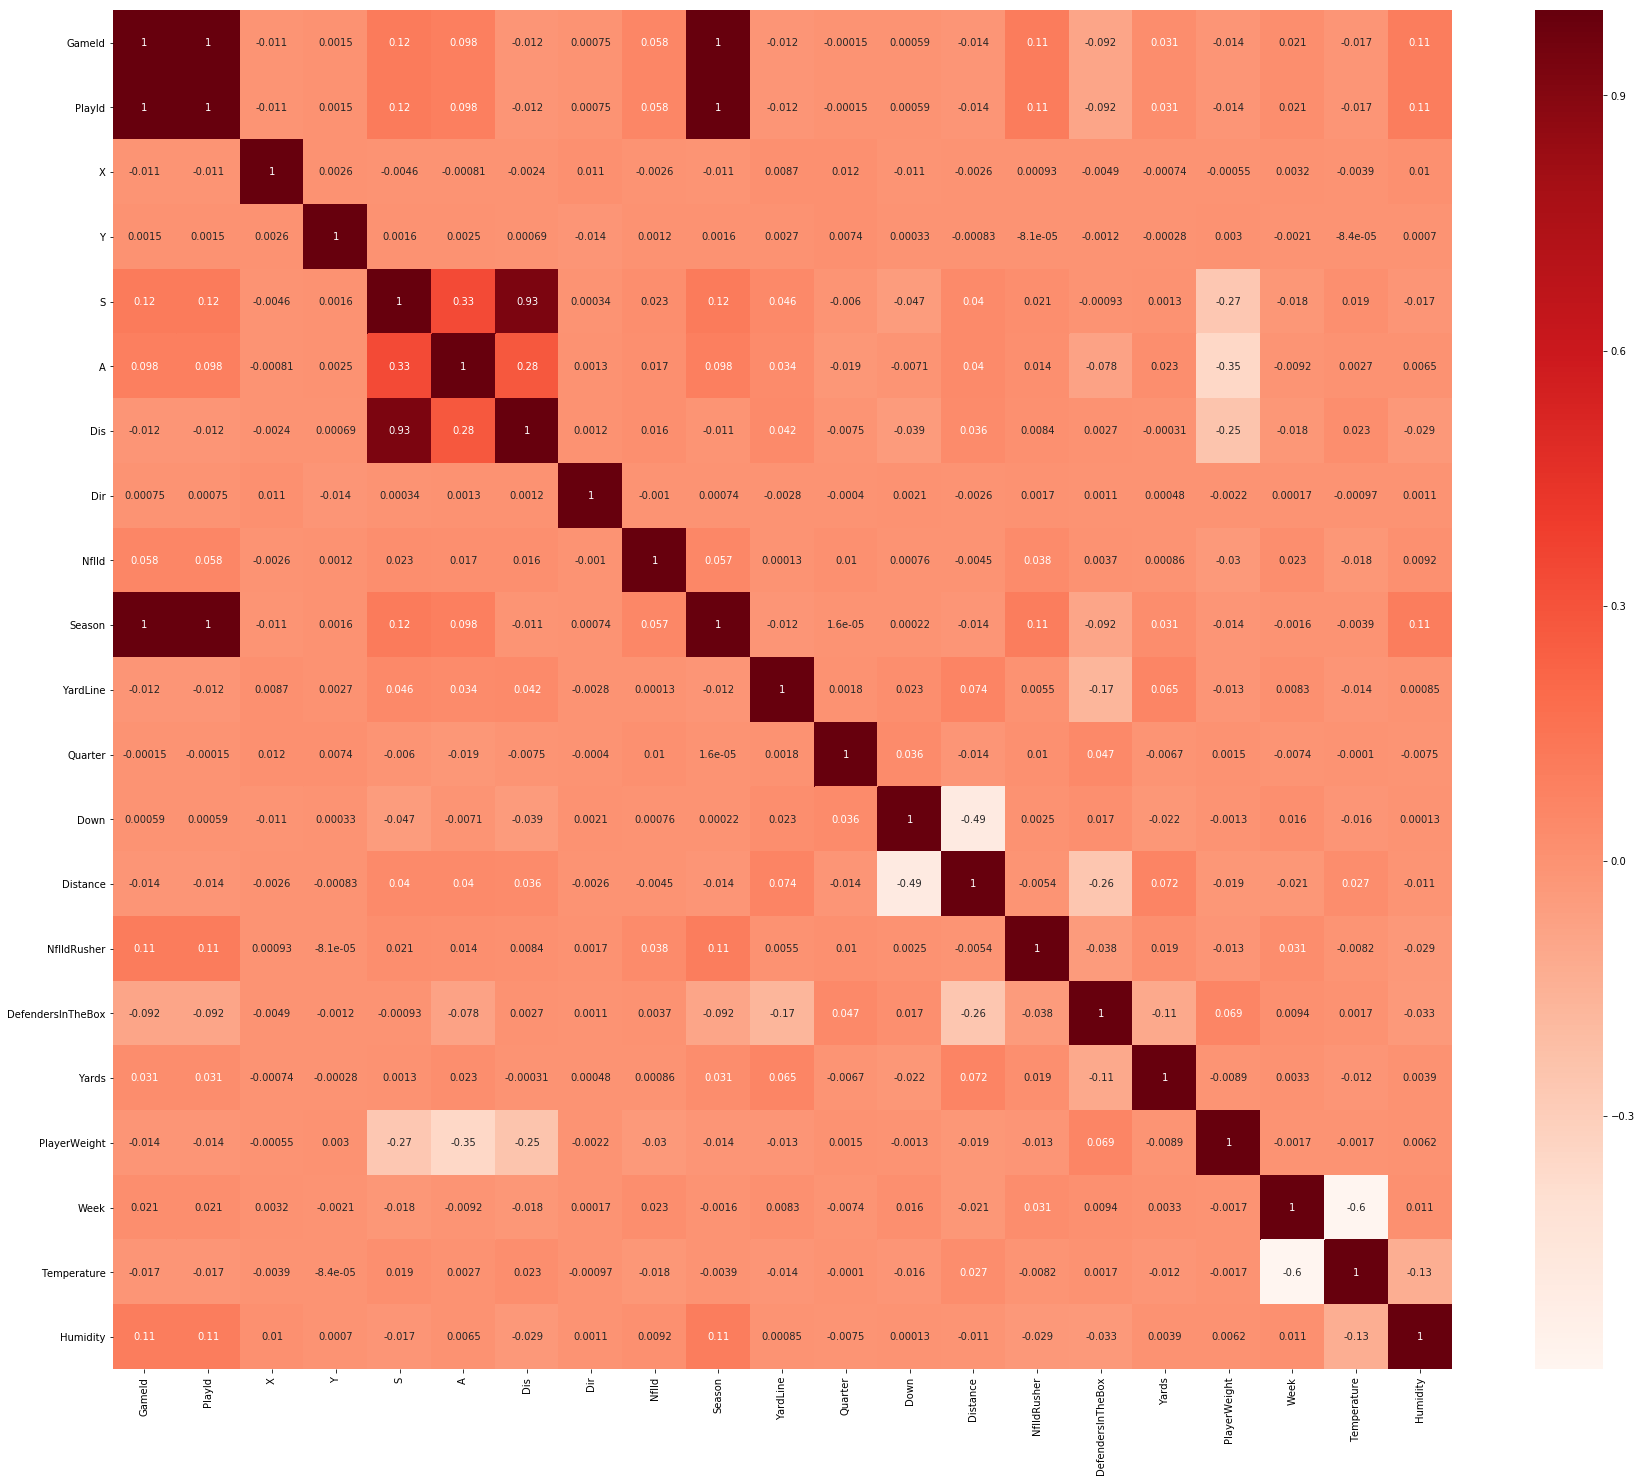

In [60]:
#Using Pearson Correlation
plt.figure(figsize=(30,25))
cor = modDataFrame.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()